<a href="https://colab.research.google.com/github/JaySanthanam/Programming-for-data/blob/main/Projects/NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The National Basketball Association publish information about their end of season awards on their website (https://www.basketball-reference.com/awards/awards_2021.html)

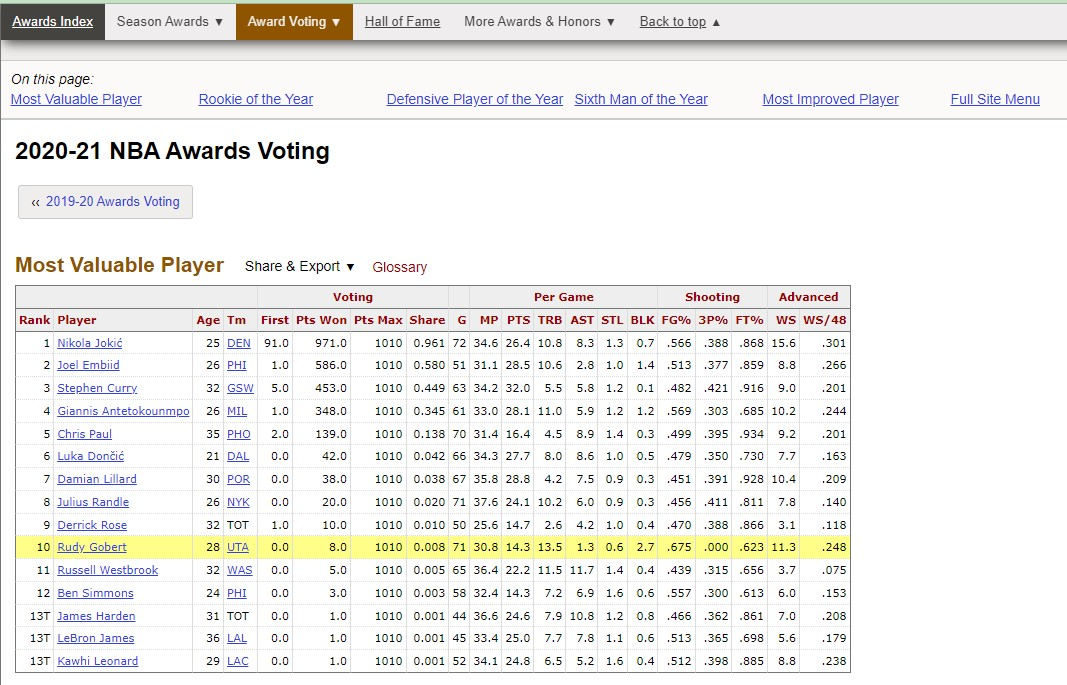

We might use these tables to help predict the Most Valued Player in the National Basketball Association league for 2022.  We would start this process by scraping the data from their website.  

## For reference:
---


This is the code used to scrape the tables from the website, using Colabs, and saving them in .csv files, downloaded to the local device.  They have been uploaded to Github so that you don't need to get them again.  The code below is included for reference.
```
import requests
from bs4 import BeautifulSoup
import pandas as pd
from google.colab import files

def get_data():
  years = list(range(1991, 2021))
  url = "https://www.basketball-reference.com/awards/awards_{}.html"
  for year in years:
    year_url = url.format(year)
    data = requests.get(year_url)
    soup = BeautifulSoup(data.text, "html.parser")
    soup.find('tr', class_="over_header").decompose()
    mvp_table = soup.find(id="mvp")
    mvp_year = pd.read_html(str(mvp_table))[0]
    filename = "mvp_{}.csv"
    mvp_year.to_csv(filename.format(year))
    files.download(filename.format(year))
  return mvp_year

table_data = get_data()
```





##Data sources:
---


The downloaded files were then uploaded to Github and are stored in this folder: https://github.com/futureCodersSE/python-programming-for-data/tree/main/Datasets/NBA-MVP.  Links to individual files are https://github.com/futureCodersSE/python-programming-for-data/blob/main/Datasets/NBA-MVP/mvp_1991.csv with the year replaced each time.

## Activity
---

Read the datasets (there are 11 dataset files - 1991 to 2021 - how can you use a loop to do this?)

Investigate the contents of the resulting dataframes.  

Can they be sensibly merged?  What do you observe?

Does sorting revealt any trends?

Is there a trend in performance (



Task 1: Using a for loop get data for each year from 1991 to 2021 and save them in one dictionary together. So I can access them when I need to merge them.

In [2]:

import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_data(url):
  data = requests.get(url)
  soup = BeautifulSoup(data.text, "html.parser")
  soup.find('tr', class_="over_header").decompose()
  mvp_table = soup.find(id="mvp")
  mvp_df = pd.read_html(str(mvp_table))[0]  #TypeError: 'str' object is not callable !!!
  return mvp_df

#def get_dataframe(url):  # function to read csv files from url
#  df  = pd.read_csv(url,index_col=False)
#  return df

#Using a for loop read all the csv files and save the dataframes in one dictionary
url_str2 = "https://www.basketball-reference.com/awards/awards_"
#url_str1 = "https://raw.githubusercontent.com/futureCodersSE/python-programming-for-data/main/Datasets/NBA-MVP/mvp_"
df ={}
for i in range(1991,2022):
  url = url_str2+str(i)+".html"
  # print(url)
  df[i] = get_data(url)



All the dataframes from 1991 to 2021 are now saved in the dictionary df.

Task 2: Next I will take a look their columns and shapes and see if I can merge them in a sensible way.

In [3]:
#Let's take a look at the dataframes to see what columns to merge with.

for i in range(1991,2022):
  print(df[i].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     20 non-null     object 
 1   Player   20 non-null     object 
 2   Age      20 non-null     int64  
 3   Tm       20 non-null     object 
 4   First    20 non-null     float64
 5   Pts Won  20 non-null     float64
 6   Pts Max  20 non-null     int64  
 7   Share    20 non-null     float64
 8   G        20 non-null     int64  
 9   MP       20 non-null     float64
 10  PTS      20 non-null     float64
 11  TRB      20 non-null     float64
 12  AST      20 non-null     float64
 13  STL      20 non-null     float64
 14  BLK      20 non-null     float64
 15  FG%      20 non-null     float64
 16  3P%      20 non-null     float64
 17  FT%      20 non-null     float64
 18  WS       20 non-null     float64
 19  WS/48    20 non-null     float64
dtypes: float64(14), int64(3), object(3)
memory usage: 3.2+ K

The columns in all the dataframes have the same headings and are the same in number. Only thing is it looks like some of them may have non-null values. But that will be dealt with when cleaning up the data. For now, let's look at how best to merge them.

In [4]:
new_df = df[1991]
for i in range(1992,2022):
  df_add = df[i]
  new_df = pd.concat([new_df,df_add])

Let's see if the data are all merged and put together. The total number of rows should be 474, the first and last players' names are Jokić (from 1991 data) Leonard (from 2021 data) respectively.

In [5]:
print(new_df.info())
print(new_df.head())
print(new_df.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 14
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     474 non-null    object 
 1   Player   474 non-null    object 
 2   Age      474 non-null    int64  
 3   Tm       474 non-null    object 
 4   First    474 non-null    float64
 5   Pts Won  474 non-null    float64
 6   Pts Max  474 non-null    int64  
 7   Share    474 non-null    float64
 8   G        474 non-null    int64  
 9   MP       474 non-null    float64
 10  PTS      474 non-null    float64
 11  TRB      474 non-null    float64
 12  AST      474 non-null    float64
 13  STL      474 non-null    float64
 14  BLK      474 non-null    float64
 15  FG%      474 non-null    float64
 16  3P%      463 non-null    float64
 17  FT%      474 non-null    float64
 18  WS       474 non-null    float64
 19  WS/48    474 non-null    float64
dtypes: float64(14), int64(3), object(3)
memory usage: 77.8+

The dataframes seem to be appended together well. Keeping all columns will lead to overfitting data. Choosing only the relevant features would help reduce noise and lead to better understanding of the trends. Better to get information we need to know what columns have more relavance/weight in predicting MVP based on further understanding. I know nothing about NBA and will need to look into what the columns mean. So let me understand that first and then get back here with relavant columns to look into.

Looks like voting (Share) and Win Share (performance in games) are more important than defensive plays such as blocking, stealing etc. So I am going to be looking into sorting by share and winshare in 48 minutes(WS/48). I will also assume that, pts scored in games and matches played (the more they play more likely to be a valued player) will also play a role. However, total points doesn't make sense. So I will be making a colums for Pts_per_game that gives a better picture of the players' performance. We will then look into top 10 players from 1981 to 2021.

In [6]:
new_df_sort = new_df.sort_values(by=['WS/48', 'Share', 'MP'])
print(new_df_sort.head(10))

   Rank             Player  Age   Tm  First  ...    FG%    3P%    FT%   WS  WS/48
17  17T      Allen Iverson   21  PHI    0.0  ...  0.416  0.341  0.702  4.1  0.065
12   13         Jason Kidd   21  DAL    0.0  ...  0.385  0.272  0.698  3.7  0.066
11   12     Antoine Walker   21  BOS    0.0  ...  0.423  0.312  0.645  4.7  0.070
15   16       Bernard King   34  WSB    0.0  ...  0.472  0.216  0.790  3.5  0.070
10   11  Russell Westbrook   32  WAS    0.0  ...  0.439  0.315  0.656  3.7  0.075
12   13     Michael Jordan   38  WAS    0.0  ...  0.416  0.189  0.790  3.3  0.075
13  12T    Stephen Jackson   31  TOT    0.0  ...  0.423  0.328  0.779  5.0  0.077
8     9       LeBron James   19  CLE    0.0  ...  0.417  0.290  0.754  5.1  0.078
13  14T    Carmelo Anthony   19  DEN    0.0  ...  0.426  0.322  0.777  6.1  0.098
12   13       Isiah Thomas   29  DET    0.0  ...  0.435  0.292  0.782  3.4  0.098

[10 rows x 20 columns]


Before proceeding any further, since I am only interested in looking at MVP trends, I want to actually do a different way of concatanating the dataframes. So let's redo the concatanation with this new knowledge of relavant columns - Year (so I can look at trends), player, Share (I don't need points and max points since Share = points/max points) and win share (WS/48).

In [7]:
#MVP dataframes concatatnated together with just relavant columns only
MVP_df = df[1991]
MVP_df["Year"] = 1991
for i in range(1992,2022):
  df_add = df[i]
  df_add["Year"] =i
  MVP_df = pd.concat([MVP_df,df_add])

#MVP_df["Year"] = pd.to_datetime(MVP_df.Year, format='%Y')

print(MVP_df.head())
print(MVP_df.tail())
print(MVP_df.info())

  Rank           Player  Age   Tm  First  ...    3P%    FT%    WS  WS/48  Year
0    1   Michael Jordan   27  CHI   77.0  ...  0.312  0.851  20.3  0.321  1991
1    2    Magic Johnson   31  LAL   10.0  ...  0.320  0.906  15.4  0.251  1991
2    3   David Robinson   25  SAS    6.0  ...  0.143  0.762  17.0  0.264  1991
3    4  Charles Barkley   27  PHI    2.0  ...  0.284  0.722  13.4  0.258  1991
4    5      Karl Malone   27  UTA    0.0  ...  0.286  0.770  15.5  0.225  1991

[5 rows x 21 columns]
   Rank             Player  Age   Tm  First  ...    3P%    FT%   WS  WS/48  Year
10   11  Russell Westbrook   32  WAS    0.0  ...  0.315  0.656  3.7  0.075  2021
11   12        Ben Simmons   24  PHI    0.0  ...  0.300  0.613  6.0  0.153  2021
12  13T       James Harden   31  TOT    0.0  ...  0.362  0.861  7.0  0.208  2021
13  13T       LeBron James   36  LAL    0.0  ...  0.365  0.698  5.6  0.179  2021
14  13T      Kawhi Leonard   29  LAC    0.0  ...  0.398  0.885  8.8  0.238  2021

[5 rows x 21 col

We now have a dataframe with relavant columns in MVP_df. Let's clean it up a bit. Let's see if there are any null values and remove relavant rows for the columns "win share" and "share". I have chosen these coulumns since I am going to sort the data based on these coulmns and also look at plotting with these columns. Let's focus on one thing at a time to gain some insights

In [8]:
MVP_df = MVP_df.drop_duplicates()
MVP_df_v2 = MVP_df.drop_duplicates(subset = ['WS/48', 'Share'])
MVP_df_v2 = MVP_df_v2.dropna(subset=['WS/48', 'Share'])
print(MVP_df_v2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 14
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     452 non-null    object 
 1   Player   452 non-null    object 
 2   Age      452 non-null    int64  
 3   Tm       452 non-null    object 
 4   First    452 non-null    float64
 5   Pts Won  452 non-null    float64
 6   Pts Max  452 non-null    int64  
 7   Share    452 non-null    float64
 8   G        452 non-null    int64  
 9   MP       452 non-null    float64
 10  PTS      452 non-null    float64
 11  TRB      452 non-null    float64
 12  AST      452 non-null    float64
 13  STL      452 non-null    float64
 14  BLK      452 non-null    float64
 15  FG%      452 non-null    float64
 16  3P%      445 non-null    float64
 17  FT%      452 non-null    float64
 18  WS       452 non-null    float64
 19  WS/48    452 non-null    float64
 20  Year     452 non-null    int64  
dtypes: float64(14), i

Looks good and now we have the Year in a separate column. Let's see what we get when we sort the data based on columns Share and WS/48. I think an MVP will have to do well in both votes share and win points share. 

In [9]:
MVP_sort_v2 = MVP_df_v2.sort_values(by=['Share'])
print(MVP_sort_v2.head(10))
print(MVP_sort_v2.tail(10))

   Rank             Player  Age   Tm  First  ...    3P%    FT%    WS  WS/48  Year
14  13T      Kawhi Leonard   29  LAC    0.0  ...  0.398  0.885   8.8  0.238  2021
9   10T      Allen Iverson   30  PHI    0.0  ...  0.323  0.814  10.6  0.165  2006
15  15T        Baron Davis   27  GSW    0.0  ...  0.304  0.745   6.4  0.139  2007
16  15T        Tony Parker   24  SAS    0.0  ...  0.395  0.783   9.6  0.185  2007
13  14T      Carlos Boozer   26  UTA    0.0  ...  0.000  0.738  10.2  0.173  2008
14  14T     Antawn Jamison   31  WAS    0.0  ...  0.339  0.760   9.2  0.144  2008
15  14T        Paul Pierce   30  BOS    0.0  ...  0.392  0.843  12.4  0.207  2008
12  13T  Darrell Armstrong   31  ORL    0.0  ...  0.340  0.911   8.0  0.149  2000
16  14T    Rasheed Wallace   33  DET    0.0  ...  0.356  0.767   7.6  0.155  2008
11   12           Yao Ming   28  HOU    0.0  ...  1.000  0.866  10.6  0.196  2009

[10 rows x 21 columns]
  Rank            Player  Age   Tm  First  ...    3P%    FT%    WS  WS/48 

Going by this, data, we can see that the Stephen Curry (2016) seems to be most popular! Next we will look into how the players points scored in the games work.

In [10]:
MVP_sort_v2_1 = MVP_df_v2.sort_values(by=['PTS'])
print(MVP_sort_v2_1.head(10))
print(MVP_sort_v2_1.tail(10))

   Rank         Player  Age   Tm  First  ...    3P%    FT%    WS  WS/48  Year
12  11T  Dennis Rodman   32  SAS    0.0  ...  0.208  0.520   8.7  0.140  1994
14   15  Dennis Rodman   34  CHI    0.0  ...  0.111  0.528   6.2  0.143  1996
7     8    Ben Wallace   28  DET    1.0  ...  0.167  0.450  10.6  0.176  2003
11   12  Dennis Rodman   33  SAS    0.0  ...  0.000  0.676   5.8  0.178  1995
17  16T   Mark Jackson   33  IND    0.0  ...  0.311  0.823   3.8  0.134  1999
9    10    Ben Wallace   27  DET    0.0  ...  0.000  0.423  11.6  0.190  2002
6     7    Ben Wallace   29  DET    0.0  ...  0.125  0.490  10.2  0.160  2004
9    10  Dennis Rodman   30  DET    0.0  ...  0.317  0.600  12.6  0.183  1992
14  14T   Marcus Camby   30  DEN    0.0  ...  0.000  0.723   5.8  0.138  2005
10  10T    Rajon Rondo   24  BOS    0.0  ...  0.233  0.568   6.6  0.126  2011

[10 rows x 21 columns]
  Rank             Player  Age   Tm  First  ...    3P%    FT%    WS  WS/48  Year
0    1  Russell Westbrook   28  OKC  

The top players who have scored best in the past 30 years is James Harden (twice in 2019 and 2020!) and Kobe Bryant. However, more games you play more points you score. So to me points per game seems to make more sense. So let's make a column for that!

In [11]:
MVP_sort_v2["PTS_per_match"] = MVP_sort_v2["PTS"]/MVP_sort_v2["MP"]
MVP_sort_v2_2 = MVP_sort_v2.sort_values(by=['PTS_per_match'])
print(MVP_sort_v2_2.head(10))
print(MVP_sort_v2_2.tail(10))

   Rank         Player  Age   Tm  ...    WS  WS/48  Year  PTS_per_match
12  11T  Dennis Rodman   32  SAS  ...   8.7  0.140  1994       0.124339
14   15  Dennis Rodman   34  CHI  ...   6.2  0.143  1996       0.168712
7     8    Ben Wallace   28  DET  ...  10.6  0.176  2003       0.175127
9    10    Ben Wallace   27  DET  ...  11.6  0.190  2002       0.208219
11   12  Dennis Rodman   33  SAS  ...   5.8  0.178  1995       0.221875
9    10  Dennis Rodman   30  DET  ...  12.6  0.183  1992       0.243176
6     7    Ben Wallace   29  DET  ...  10.2  0.160  2004       0.251989
17  16T   Mark Jackson   33  IND  ...   3.8  0.134  1999       0.269504
10  10T    Rajon Rondo   24  BOS  ...   6.6  0.126  2011       0.284946
12  13T     Jason Kidd   24  PHO  ...   8.0  0.123  1998       0.305263

[10 rows x 22 columns]
  Rank                 Player  Age   Tm  ...    WS  WS/48  Year  PTS_per_match
3    4            Luka Dončić   20  DAL  ...   8.8  0.207  2020       0.857143
0    1           James Har

Looks like James Harden still holds his position but Kobe Bryant has clearly played more matches so has more pts. So Giannis Antetokounmpo fares better than Kobe Bryant when it comes to pts per game.

Let's specifically look at the columns of first votes, share and WS/48 for the top 5 and last 5 players.

In [12]:
print(MVP_sort_v2[["Player","Share","WS/48", "Year"]])

              Player  Share  WS/48  Year
14     Kawhi Leonard  0.001  0.238  2021
9      Allen Iverson  0.001  0.165  2006
15       Baron Davis  0.001  0.139  2007
16       Tony Parker  0.001  0.185  2007
13     Carlos Boozer  0.001  0.173  2008
..               ...    ...    ...   ...
0       Kevin Durant  0.986  0.295  2014
0      Kevin Garnett  0.991  0.272  2004
0   Shaquille O'Neal  0.998  0.283  2000
0       LeBron James  0.998  0.322  2013
0      Stephen Curry  1.000  0.318  2016

[452 rows x 4 columns]


The above shows the top 5 and last 5 players based on winshare (per game) and vote share. Let's drop the other non-relavant columns.

In [13]:
MVP_df_v3 = MVP_df_v2.drop(columns=["Tm","First","Pts Won","Pts Max","G","MP","PTS","TRB","AST","STL","BLK","FG%","3P%","FT%","WS"])
print(MVP_df_v3.head())
print(MVP_df_v3.tail())

  Rank           Player  Age  Share  WS/48  Year
0    1   Michael Jordan   27  0.928  0.321  1991
1    2    Magic Johnson   31  0.518  0.251  1991
2    3   David Robinson   25  0.496  0.264  1991
3    4  Charles Barkley   27  0.231  0.258  1991
4    5      Karl Malone   27  0.148  0.225  1991
   Rank             Player  Age  Share  WS/48  Year
9    10        Rudy Gobert   28  0.008  0.248  2021
10   11  Russell Westbrook   32  0.005  0.075  2021
11   12        Ben Simmons   24  0.003  0.153  2021
12  13T       James Harden   31  0.001  0.208  2021
14  13T      Kawhi Leonard   29  0.001  0.238  2021


Let's do some visualisations and See what we can make out by each variable/column.

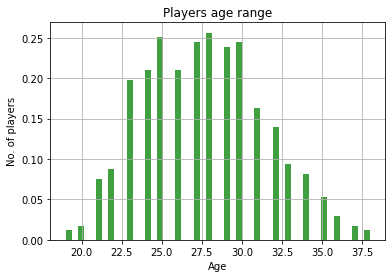

In [14]:
import matplotlib  
import matplotlib.pyplot as plt
#histogram
plt.hist(MVP_df_v3["Age"], 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Age')
plt.ylabel('No. of players')
plt.title('Players age range')
plt.grid(True)
plt.show()

The above graph shows age distribution of players, with majority of the playets in the range of 23 to 30.

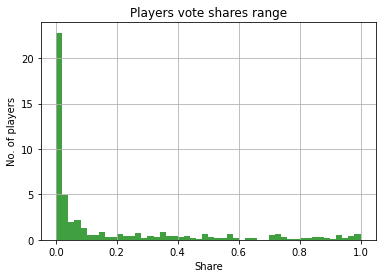

In [15]:
plt.hist(MVP_df_v3["Share"], 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Share')
plt.ylabel('No. of players')
plt.title('Players vote shares range')
plt.grid(True)
plt.show()

the above graph shows the vote shares for players to be ranked into top 10. As expected very few players get voted into top 10 ranks for MVP.

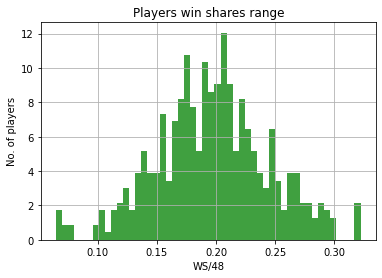

In [16]:
plt.hist(MVP_df_v3["WS/48"], 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('WS/48')
plt.ylabel('No. of players')
plt.title('Players win shares range')
plt.grid(True)
plt.show()

Again, the distribution shows that very few players score really high and few score really low. Pretty close to normal distribution.

Next let's look at dependence between columns by using scatter plot.

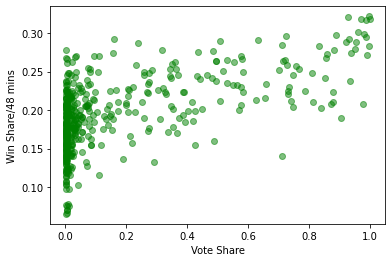

In [17]:
plt.scatter(MVP_df_v3["Share"],MVP_df_v3["WS/48"],c="g", alpha=0.5)
plt.xlabel("Vote Share")
plt.ylabel("Win Share/48 mins")
plt.show()

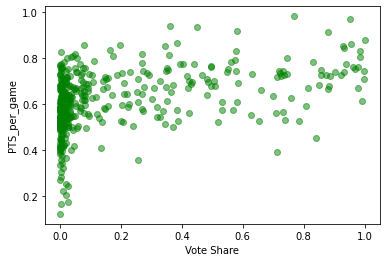

In [18]:
plt.scatter(MVP_sort_v2["Share"],MVP_sort_v2["PTS_per_match"],c="g", alpha=0.5)
plt.xlabel("Vote Share")
plt.ylabel("PTS_per_game")
plt.show()

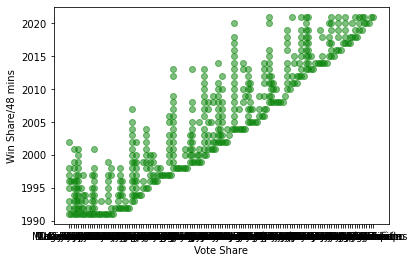

In [19]:
plt.scatter(MVP_df_v3["Player"],MVP_df_v3["Year"],c="g", alpha=0.5)
plt.xlabel("Vote Share")
plt.ylabel("Win Share/48 mins")
plt.show()

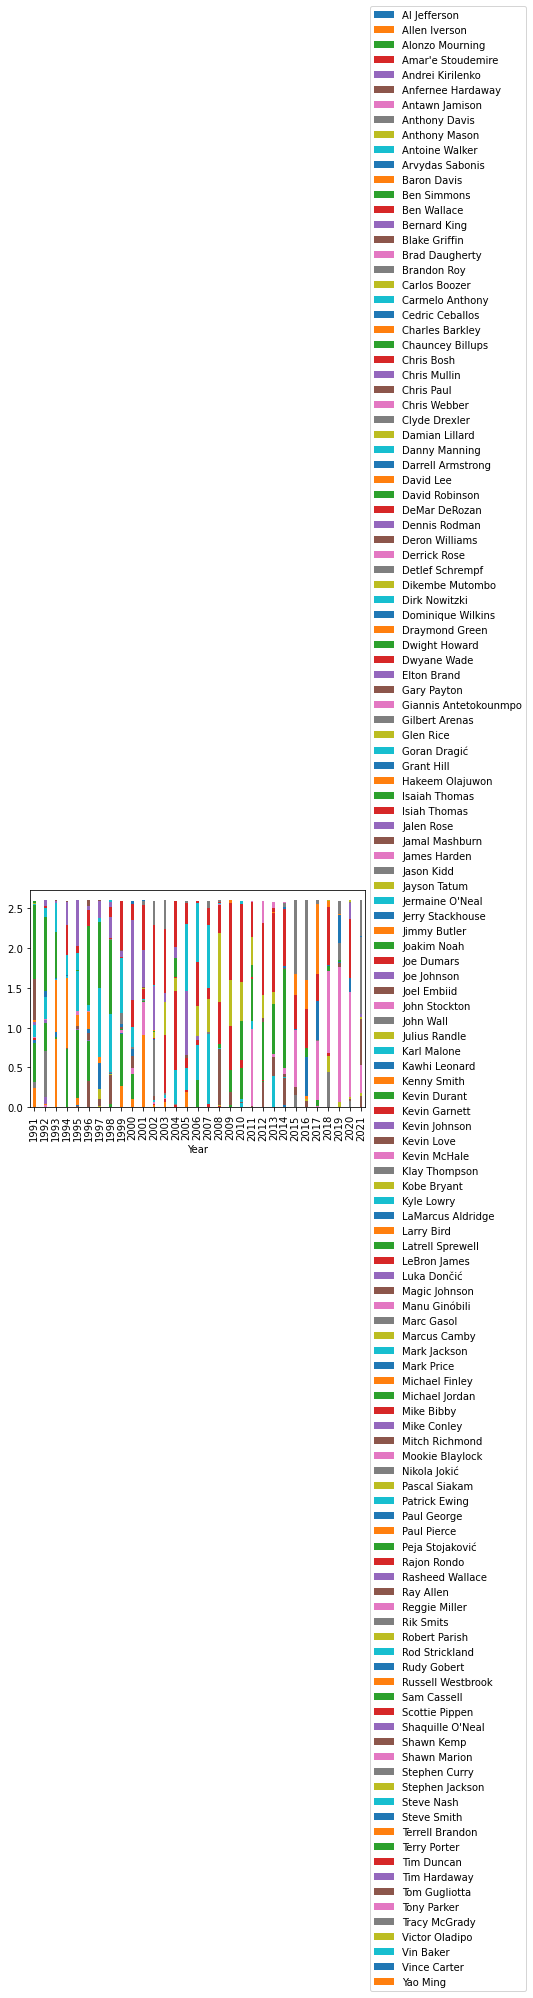

In [20]:

#MVP_df_v3 = MVP_df_v3.drop_duplicates(subset = ['Age'])
MVP_sort_share = MVP_df_v3.pivot(index="Year", columns="Player", values = "Share") 
MVP_sort_share.plot(kind='bar', stacked=True, width=0.25, align='center')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

I tried to do a bar chart of players and their vote shares to look at the historical trend. But I find this is too much information and cannot make out anything sensible out of it.

###Yearly trends

Let's have a look at the how the players' performance has changed over time (imporved, got worse, stayed the same etc). This might be better than looking at all of the information just thrown at us (liek above!).

In [21]:
def get_grouped_stats(df, col):
  df = df.groupby(col).count()
  return df

def get_grouped_max(df,col):
  df = df.groupby(col).max()
  return df 

def get_grouped_min(df,col):
  df = df.groupby(col).min()
  return df 

def get_sort_year(df):
  df  = df.sort_values(by = ["Year", "Player"])[["Year","Player"]]
  return df

player_stats = get_grouped_stats(MVP_df,"Player")
player_max = get_grouped_max(MVP_df,"Player")
player_min = get_grouped_min(MVP_df,"Player")
player_by_year = get_sort_year(MVP_df)

player_stats

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  # Remove the CWD from sys.path while we load stuff.


,Rank,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
Player,,,,,,,,,,,,,,,,,,,,
Al Jefferson,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Allen Iverson,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Alonzo Mourning,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Amar'e Stoudemire,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Andrei Kirilenko,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ty Lawson,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Victor Oladipo,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Vin Baker,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


### Time to do some statistical analysis.

1. Let's do some linear regression to see the relation between votes gained (share) and players age, ws/48 and pts_per_game.
2. Is there a correlation between, vote Share and Age?
3. How about the correlation between win share and vote share?

In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats.stats import pearsonr

x = np.array(MVP_df_v3['Age']).reshape((-1, 1))
y = np.array(MVP_df_v3['Share'])

model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('slope:', model.coef_)
print('intercept:', model.intercept_)

ind1 = np.array(MVP_df_v3['Age'])
my_corr1 = stats.pearsonr(ind1,y)
print("Pearson's correlation:", my_corr1)


coefficient of determination: 0.0002287836824177436
slope: [-0.00110643]
intercept: 0.20879382625297171
Pearson's correlation: (-0.015125596927649245, 0.7484358487752232)


This tells me that the as the players get older their chances of get votes goes down slightly (by 1%) and the average starting age of the players is 20.8 (as seen in the histogram). The correlation between age and getting votes is weak (-0.015 with a p-value 0.75).

In [23]:
x1 = np.array(MVP_df_v3['WS/48']).reshape((-1, 1))

model1 = LinearRegression().fit(x1, y)
r_sq1 = model.score(x1, y)
print('coefficient of determination:', r_sq1)
print('slope:', model1.coef_)
print('intercept:', model.intercept_)

ind2 = np.array(MVP_df_v3['WS/48'])
my_corr2 = stats.pearsonr(ind2,y)
print("Pearson's correlation:", my_corr2)


coefficient of determination: -0.01234828579150693
slope: [3.40012714]
intercept: 0.20879382625297171
Pearson's correlation: (0.5874296619201692, 2.803124834211685e-43)


The number of win shares that players score has increases their chance of getting more votes (rate of 3.4). The correlation between winshares and voting share is strong (0.6 with p-vlaue 2.8e-43 - showing high significance)

How about both age and points per game together? - let's look at the multiple regression.

In [24]:
x2 = MVP_sort_v2_2[['Age','PTS_per_match']]
x2 = np.array(x2)
model2 = LinearRegression().fit(x2, y)
r_sq2 = model2.score(x2,y)
print('coefficient of determination:', r_sq2)
print('slope:', model2.coef_)
print('intercept:', model2.intercept_)

coefficient of determination: 0.0008753878269522897
slope: [-0.00118203  0.04907489]
intercept: 0.18072200040197206


Here we looked at how age of players and their total pts per game is related to the votes share. We see a positive trend when players score well per game (0.05 rate) and slightly negative trend (1% change as seen before) for age.

Writing a function is alwasy helpful when we have repeated codes. So we can simply call them to do it for it many number of times. Taking on Karen's suggestions, I am going to write 2 functions

1. To find player stats for each column name- for example, get maximum, mean, median, total number for eaach column for the particular player. If median is larger than mean, we can consider that particular attribute a strength of the player.
2. To find top 10 players based on a particular stats column - could be used to look at players who are good at blocks or steals or winshares or vote shares etc.

In [29]:
def get_player_stats(df, player,column):
  df = df.loc[df['Player'] == player]
  play_max = df.groupby(["Player"])[column].max()
  play_ave = df.groupby(["Player"])[column].mean()
  play_med = df.groupby(["Player"])[column].median()
  play_count = df.groupby(["Player"])[column].count()
  index  = play_max.keys()
  rank = list(play_max)
  ave = list(play_ave)
  median = list(play_med)
  count = list(play_count)
  d = {'Player': index, 'maximum': rank, 'mean': ave, 'median': median, 'count': count}
  play_stats = pd.DataFrame(data=d)
  return play_stats

player = "Michael Jordan"
player_pts_won = get_player_stats(MVP_df_v2, player, "Pts Won")
player_blk = get_player_stats(MVP_df_v2, player, "BLK")
player_stl = get_player_stats(MVP_df_v2, player, "STL")
player_TRB = get_player_stats(MVP_df_v2, player, "TRB")
player_AST = get_player_stats(MVP_df_v2, player, "AST")
print("Stats for", player)
print("points won")
print(player_pts_won)
print("blocks")
print(player_blk)
print("steals")
print(player_stl)
print("Total Rebound Percentage")
print(player_TRB)
print("Assists")
print(player_AST)

Stats for Michael Jordan
points won
           Player  maximum     mean  median  count
0  Michael Jordan   1114.0  692.375   895.5      8
blocks
           Player  maximum   mean  median  count
0  Michael Jordan      1.0  0.675    0.65      8
steals
           Player  maximum   mean  median  count
0  Michael Jordan      2.8  2.075     2.0      8
Total Rebound Percentage
           Player  maximum  mean  median  count
0  Michael Jordan      6.9  6.25     6.2      8
Assists
           Player  maximum    mean  median  count
0  Michael Jordan      6.1  4.9625    5.25      8


Clearly Kobe's strength lies in scoring points. This can be repeated for other players too. This will help identify players' strengths during the game.

LeBron James is good at both scoring points and Total rebound percentage

Stats for Stephen Curry shows that he hasn't had a very consistent carrier in scoring points his median is 120 and average 407, showing that his scores can be pretty low or high.

Michael Jordan has shown that he is highly consistent in both pts won and assists and has overall consistent performance.

Again, these conclusions are simply based on looking at aggregate stats for each player, particularly, the mean and median. Experts may have a different criteria to look at a player's career. 

In [33]:
def get_year_stats(df, year):
  df = df.loc[df['Year'] == year]
  yr_rank = df.idxmax(axis =0)
  return yr_rank

year = 2015
df = pd.DataFrame({'Year': list(MVP_df_v2["Year"]), 'points won': list(MVP_df_v2["Pts Won"]),'Share': list(MVP_df_v2["Share"]), 'games played': list(MVP_df_v2["G"]), 'Minutes Played': list(MVP_df_v2["MP"]), 'Points max': list(MVP_df_v2["Pts Max"]), 'PTS': list(MVP_df_v2["PTS"]), 'TRB': list(MVP_df_v2["TRB"]),'Steals': list(MVP_df_v2["STL"]),'Assist': list(MVP_df_v2["AST"]), 'Block':list(MVP_df_v2["BLK"]), 'FG%': list(MVP_df_v2["FG%"]), '3P%': list(MVP_df_v2["3P%"]), 'FT%': list(MVP_df_v2["FT%"]), 'WS': list(MVP_df_v2["WS"]), 'WS/48': list(MVP_df_v2["WS/48"])},
                    index= list(MVP_df_v2["Player"]))
yr_stats = get_year_stats(df, year)
print("Top players of the year", year, "in each category")
print(yr_stats)

Top players of the year 2015 in each category
Year                  Stephen Curry
points won            Stephen Curry
Share                 Stephen Curry
games played             Chris Paul
Minutes Played         James Harden
Points max            Stephen Curry
PTS               Russell Westbrook
TRB                   Anthony Davis
Steals                Kawhi Leonard
Assist                   Chris Paul
Block                 Anthony Davis
FG%                   Anthony Davis
3P%                   Stephen Curry
FT%                   Stephen Curry
WS                     James Harden
WS/48                 Stephen Curry
dtype: object


Now we can see the best player for each category by year. 

## Reference
---
**Video link**: https://www.youtube.com/watch?v=JGQGd-oa0l4 used as an initial inspiration and modified to allow use of Google Colab and slower progress towards predictions (video uses Jupyter notebooks and local files so code is different)

# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer: I have used my skills in pandas for data reteival, web scrapping, wrangling data, cleaning and sorting data. I have also used my numpy skills to do linear regression (both simple and multiple). I have used graphical libraries to do plots and also have used scipy skills to do Pearson's correlation.

## What caused you the most difficulty?

The biggest challenge for me was the unfamiliarity with Basketball and NBA. I have zero knowledge of both. I think to be able to do anything to get useful insights I need to know more about the what the data columns mean in the world of NBA. I have managed to scratch the tip of information and have tried to draw some conclusions. But to use this information in these data frames properly, I will need to spend more time trying to understand the colums headings and what the terms mean in NBA. I do not need a thourough knowldege, but, just enough to understand how the MVP voting happens and what these stats actually mean. 